In [30]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 20000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
word_index = imdb.get_word_index()

In [31]:
# Analyze sequence length values
lens = []
for x in x_train:
    lens.append(len(x))

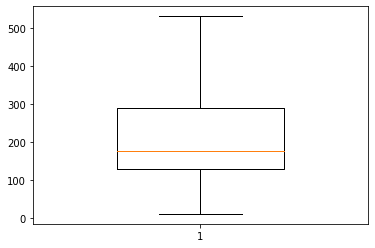

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(lens, widths=0.5, manage_ticks=True, showfliers=False)
plt.show()

In [53]:
import numpy as np

arr = np.array(lens)
maxlen = int(arr.mean() - arr.std())

In [54]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [55]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout

model = Sequential()
model.add(Embedding(max_features, 16, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10,
batch_size=64, validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 62, 16)            320000    
_________________________________________________________________
flatten_10 (Flatten)         (None, 992)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                31776     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

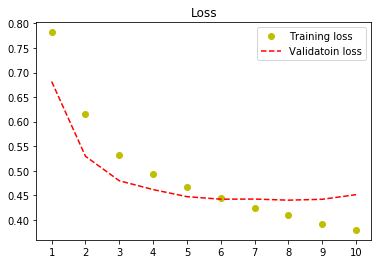

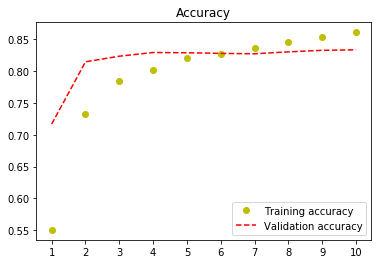

In [57]:
from util import plot_history

plot_history(history)